### Data: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [2]:
## this code is designed to find the number of features needed in the X data for an optimal accuracy score

def optimize_score_rfe(dataframe,method,style,target_variable,cross_val=5,goal='accuracy'):
    
    """
    Input a goal, method, style (the method of analysis written as a string), and number of cross validations and 
    receive an optimal score, number of features used, and list of features used as an output
    """
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_selection import RFE
    mms = MinMaxScaler()
    old_score = 0
    old_features_used = 1

    for i in range(1,df.shape[1]):
        y = dataframe.Target
        X = dataframe.drop('Target',axis=1)
        selector = RFE(method,n_features_to_select=i)
        # selector = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring=goal,min_features_to_select=i)
        selector = selector.fit(X, y.values.ravel())
        selected_columns = X.columns[selector.support_]
        new_y = dataframe.Target
        new_X = dataframe[selected_columns]
        for col in new_X.columns:
            new_X[col] = mms.fit_transform(new_X[[col]])
        X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=0.25,random_state=14) 
        method.fit(X_train,y_train)
        Y_pred = method.predict(X_test)
        if style == 'Linear_Regression':
            accuracy = r2_score(y_test, Y_pred)
        else:
            accuracy = accuracy_score(y_test, Y_pred)
        new_score = accuracy
        if new_score > old_score:
            score = new_score
            features_used = i
            old_score = new_score
            old_features_used = i
        else:
            score = old_score
            features_used = old_features_used
        # selector_new = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring='accuracy',min_features_to_select=features_used)
        selector_new = RFE(method,n_features_to_select=features_used)
        selector_new = selector_new.fit(X, y.values.ravel())
        selected_columns_new = X.columns[selector_new.support_]

    print(f'Predicting: {target_variable}')
    print('')
    print(f'The optimal score is {100*round(score,2)}%, and it makes use of {features_used} features from the data.')
    print('')
    print(f'Those features are: {list(selected_columns_new)}')

In [3]:
df = pd.read_csv('top10s.csv', encoding='ISO-8859-1')

In [4]:
print(df.shape)
df.head()

(603, 15)


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
df.drop(['title','Unnamed: 0'],axis=1,inplace=True)

In [6]:
print(df.shape)
df.head()

(603, 13)


,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [7]:
df['top genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [8]:
df['top genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
tropical house                 3
colombian pop                  3
electro                        2
electronic trap                2
acoustic pop                   2
canadian hip hop               2
baroque pop                    2
candy pop                      2
folk-pop                       2
indie pop                      2
detroit hi

In [9]:
genre_dict = {'electro house':'dance','metropopolis':'alternative','chicago rap':'hip hop','hollywood':'dance',
             'french indie pop':'indie','danish pop':'pop','irish singer-songwriter':'indie','moroccan pop':'pop',
             'house':'dance','alternative r&b':'r&b','alaska indie':'indie','canadian latin':'latin','celtic rock':'rock',
             'contemporary country':'country','australian hip hop':'hip hop','folk-pop':'indie','canadian hip hop':'hip hop',
             'acoustic pop':'indie','indie pop':'indie','belgian edm':'dance','electro':'dance','candy pop':'pop',
             'escape room':'pop','downtempo':'r&b','detroit hip hop':'hip hop','baroque pop':'pop','brostep':'dance',
             'electronic trap':'dance','colombian pop':'latin','tropical house':'dance','permanent wave':'alternative',
             'atl hip hop':'hip hop','edm':'dance','australian pop':'pop','australian dance':'dance','complextro':'dance',
            'art pop':'pop','canadian contemporary r&b':'r&b','neo mellow':'indie','big room':'dance','barbadian pop':'pop',
             'canadian pop':'pop','boy band':'pop','electropop':'dance','british soul':'r&b','alternative':'alternative',
             'country':'country','dance pop':'dance pop','dance':'dance','hip hop':'hip hop', 'indie':'indie',
             'latin':'latin','pop':'pop','r&b':'r&b','rock':'rock','hip pop':'hip hop'}

In [10]:
set(genre_dict.values())

{'alternative',
 'country',
 'dance',
 'dance pop',
 'hip hop',
 'indie',
 'latin',
 'pop',
 'r&b',
 'rock'}

In [11]:
df['top genre'] = df['top genre'].map(lambda x: genre_dict[x])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 13 columns):
artist       603 non-null object
top genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(2)
memory usage: 61.4+ KB


In [13]:
print(df.shape)
df.head()

(603, 13)


,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Train,indie,2010,97,89,67,-4,8,80,217,19,4,83
1,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [14]:
df.drop(['year','artist'],axis=1,inplace=True)

In [15]:
print(df.shape)
df.head()

(603, 11)


,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,indie,97,89,67,-4,8,80,217,19,4,83
1,hip hop,87,93,75,-5,52,64,263,24,23,82
2,dance pop,120,84,76,-3,29,71,200,10,14,80
3,dance pop,119,92,70,-4,8,71,295,0,4,79
4,pop,109,84,64,-5,9,43,221,2,4,78


In [16]:
df['Target'] = df['top genre']
df.drop('top genre',axis=1,inplace=True)

In [17]:
print(df.shape)
df.head()

(603, 11)


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Target
0,97,89,67,-4,8,80,217,19,4,83,indie
1,87,93,75,-5,52,64,263,24,23,82,hip hop
2,120,84,76,-3,29,71,200,10,14,80,dance pop
3,119,92,70,-4,8,71,295,0,4,79,dance pop
4,109,84,64,-5,9,43,221,2,4,78,pop


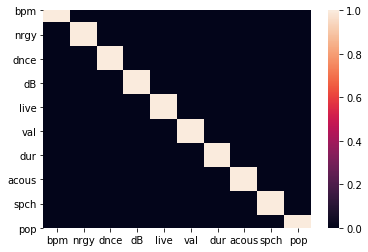

In [18]:
sns.heatmap(df.corr()>=0.7)

In [19]:
len(df.Target.unique())

10

In [20]:
target_dict = {}
for i in range(len(df.Target.unique())):
    target_dict[df.Target.unique()[i]] = i

In [21]:
target_dict

{'indie': 0,
 'hip hop': 1,
 'dance pop': 2,
 'pop': 3,
 'latin': 4,
 'dance': 5,
 'r&b': 6,
 'alternative': 7,
 'rock': 8,
 'country': 9}

In [22]:
df.Target = df.Target.map(lambda x: target_dict[x])

In [23]:
print(df.shape)
df.head()

(603, 11)


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Target
0,97,89,67,-4,8,80,217,19,4,83,0
1,87,93,75,-5,52,64,263,24,23,82,1
2,120,84,76,-3,29,71,200,10,14,80,2
3,119,92,70,-4,8,71,295,0,4,79,2
4,109,84,64,-5,9,43,221,2,4,78,3


In [24]:
df.Target.value_counts()

2    327
3    145
5     54
6     23
1     21
0     18
4      8
7      5
9      1
8      1
Name: Target, dtype: int64

In [25]:
#df = df[df.Target != 8]
#df = df[df.Target != 9]
#df = df[df.Target != 7]
#df = df[df.Target != 4]

In [26]:
print(df.shape)
df.head()

(603, 11)


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Target
0,97,89,67,-4,8,80,217,19,4,83,0
1,87,93,75,-5,52,64,263,24,23,82,1
2,120,84,76,-3,29,71,200,10,14,80,2
3,119,92,70,-4,8,71,295,0,4,79,2
4,109,84,64,-5,9,43,221,2,4,78,3


In [27]:
df.Target.value_counts()

2    327
3    145
5     54
6     23
1     21
0     18
4      8
7      5
9      1
8      1
Name: Target, dtype: int64

In [28]:
target_dict

{'indie': 0,
 'hip hop': 1,
 'dance pop': 2,
 'pop': 3,
 'latin': 4,
 'dance': 5,
 'r&b': 6,
 'alternative': 7,
 'rock': 8,
 'country': 9}

In [29]:
optimize_score_rfe(df,LogisticRegression(random_state=14),'Logistic Regression','Genre')

Predicting: Genre

The optimal score is 62.0%, and it makes use of 8 features from the data.

Those features are: ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'spch', 'pop']
